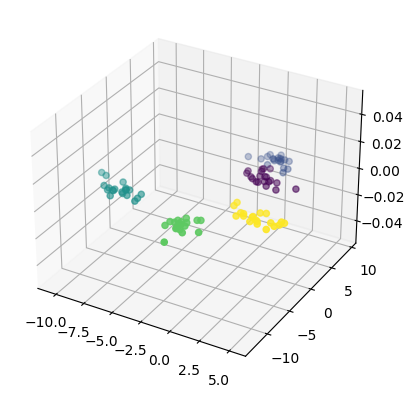

In [57]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#
X, Y = datasets.make_blobs(n_samples=100, n_features=3, centers=5, cluster_std=1.05, random_state=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [58]:
# setting the parameters
np.random.seed = 30 # so we get the same results each time
W = np.random.rand(3, 5) # 3 rows because we have three features and 5 columns because 5 classes
B = np.random.rand(5) # 5 biases cuz 5 classes
print(W, B) 
learning_rate = 0.01
num_epochs = 50

[[0.4978435  0.70735422 0.54061701 0.49912386 0.18344154]
 [0.68588748 0.15072366 0.68208447 0.70839108 0.13835945]
 [0.4122229  0.79122735 0.31275006 0.40277664 0.20676356]] [0.31992922 0.15051127 0.90842845 0.46538556 0.81750927]


In [59]:
# turns a multiclass classification problem into a binary one by creating a matrix filled with zeroes
# and populating the rows/columns with ones based on the values of y

def one_hot(y):
    classes = list(set(y)) # creates list of unique values in y
    onehot = np.zeros((len(y), len(classes))) # creates matrix of 100 rows, 5 columns 
    
    # Iterate through y and update onehot's column to 1 based on the class
    # y [0, 1, 4, 3, 2]
    for i, v in enumerate(y):
        onehot[i][v] = 1
    return onehot

In [60]:
print(np.round([1.00002, 0.677888], 4))

[1.     0.6779]


In [61]:
def softmax(z):
    #take each number in the matrix and make it e^that_number
    expz = np.exp(z) # 100x5
    #sum of all values in the row
    sumexpz = np.sum(expz, axis = 1) # 100x1
    
    # we are transposing because we want the number of columns in the first 
    # matrix to be equal to the number of rows in the second matrix
    
    #this is where the normalization occurs
    #we haven't lost each individual value despite summing each row, 
    #and then we put it over the sum to normalize it
    sigma = np.transpose(expz) / sumexpz # 5x100 / 100x1 = 5x100
    return np.transpose(sigma) # tranpose to get 100x5

In [62]:
def predict(X, W, B):
    #multiply matrix of training examples (100x3) by the weights (3x5), and add the bias (5)
    z = np.matmul(X,W)+B # (100x5)
    
    #get the prediction by normalizing using the softmax function
    y_hat = softmax(z)
    return y_hat

In [63]:
def cost_function(y_hat, Y_ohe):
    #number of training examples
    m = len(Y_ohe)
    
    #get a matrix that contains the log of the predictions only for the class we are interested in
    #its a mask, where each output weight is multiplied by 0 or 1 
    #leaving only the weight for the correct class in the matrix
    y_log_y_hat = np.multiply(np.log(y_hat), Y_ohe)
    # first we sum all of weights for the correct classes and then divide by
    # the number of training examples to get an average, we change the sign 
    # to get a positive number
    loss = -np.sum(y_log_y_hat)/m
    return loss

In [64]:
def partial_derivative_w(X, diff):
    # diff has shape 100X5 , X has shape 100X3 (examplesXfeature_values)
    # Needs to return 3X5 (shape of the weights)
    #transpose of the diff to get shape 5X100
    # matrix multiplication gives shape 5X3
    #Transpose further to get shape 3X5
    return np.transpose(np.matmul(np.transpose(diff), X)) #need matrix with numbers that indicate
#how to change the weights (above)

def partial_derivative_b(diff):
    # diff = how much change/instance, 
    #add all 100 together for the difference for each category
    # input shape 100X5, output is shape 5X100 
    # these 5 correspond to bias when summed, because
    # you know how "wrong" per category
    return np.sum(diff, axis=0)

In [65]:
def update_parameter(W, B, learning_rate, X, Y_ohe):
    m = len(X)
    
    y_hat = predict(X, W, B)
    
    cost = cost_function(y_hat, Y_ohe)
    # Subtract y-hat (probabilities for each example per class) from y-ohe 
    #(binary for each example per class) and 0 or below are the correct class
    diff = y_hat - Y_ohe
    
    partial_der_w = partial_derivative_w(X, diff)
    partial_der_b =  partial_derivative_b(diff)
    
    # take average derivative from learning rate X Part. Der. over m (one epoch)
    # for both bias and weights
    W -= learning_rate*partial_der_w/m #dependency on input features and classes 
    B -= learning_rate*partial_der_b/m # dependency on classes
    
    return W, B, cost, y_hat

In [66]:
def accuracy_metric(Y, y_hat):
    m = len(Y) # len of all examples
    correct = 0
    acc_classes = {i:[0,0] for i in range(5)}
    print(acc_classes)
    for y_true, y_pred in zip(Y, y_hat):
        # y pred = the class in y_hat with the greatest value 
        y_pred = np.argmax(y_pred) # returns the actual class w highest probability 
        
        acc_classes[y_true][0] += 1 #totals for all of the classes (0-4)
        if y_pred == y_true: # if our prediction is true
            acc_classes[y_true][1] += 1 # correct per class 
            correct+=1 # add to correct count
    print(acc_classes)
    return acc_classes, correct*100/m # percentage accuracy 
            

In [67]:
cost_per_epoch = []
acc_per_epoch = []
Y_ohe = one_hot(Y)
for epoch in range(num_epochs):
    print(f'--------This is epoch {epoch+1}----------')
    print(f'-- Old weights: {W}')
    print(f'-- Old bias: {B}')
    
    W, B, cost, y_pred = update_parameter(W, B, learning_rate, X, Y_ohe)
    acc_classes, acc = accuracy_metric(Y, y_pred)
    acc_per_epoch.append(acc_classes)
    cost_per_epoch.append(cost)
    
    print(f'-- New weights: {W}')
    print(f'-- New bias: {B}')
    print(f'-- Accuracy: {acc}')
    print('\n')

--------This is epoch 1----------
-- Old weights: [[0.4978435  0.70735422 0.54061701 0.49912386 0.18344154]
 [0.68588748 0.15072366 0.68208447 0.70839108 0.13835945]
 [0.4122229  0.79122735 0.31275006 0.40277664 0.20676356]]
-- Old bias: [0.31992922 0.15051127 0.90842845 0.46538556 0.81750927]
{0: [0, 0], 1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}
{0: [20, 0], 1: [20, 0], 2: [20, 0], 3: [20, 0], 4: [20, 0]}
-- New weights: [[0.49880972 0.70241538 0.52381897 0.49614201 0.20719406]
 [0.68767533 0.17524581 0.66247685 0.68189492 0.15815322]
 [0.40023411 0.7992445  0.2955992  0.39694552 0.23371718]]
-- New bias: [0.32093552 0.15025652 0.90889619 0.46610985 0.81556569]
-- Accuracy: 0.0


--------This is epoch 2----------
-- Old weights: [[0.49880972 0.70241538 0.52381897 0.49614201 0.20719406]
 [0.68767533 0.17524581 0.66247685 0.68189492 0.15815322]
 [0.40023411 0.7992445  0.2955992  0.39694552 0.23371718]]
-- Old bias: [0.32093552 0.15025652 0.90889619 0.46610985 0.81556569]
{0: [0, 0], 1

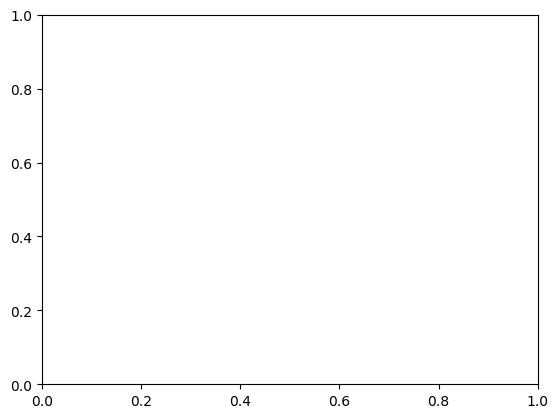

<class 'TypeError'>: float() argument must be a string or a real number, not 'dict'

In [68]:
plt.plot(acc_classes)
plt.show()

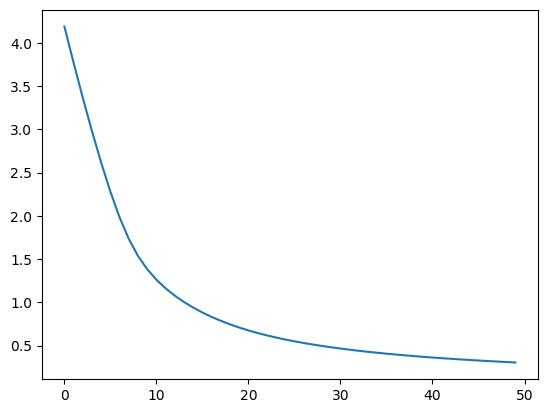

[{0: [20, 0], 1: [20, 0], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 1], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 4], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 5], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 12], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 14], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 17], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 19], 2: [20, 0], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 19], 2: [20, 8], 3: [20, 0], 4: [20, 0]}, {0: [20, 0], 1: [20, 19], 2: [20, 18], 3: [20, 0], 4: [20, 0]}, {0: [20, 1], 1: [20, 19], 2: [20, 20], 3: [20, 0], 4: [20, 0]}, {0: [20, 3], 1: [20, 20], 2: [20, 20], 3: [20, 0], 4: [20, 0]}, {0: [20, 4], 1: [20, 20], 2: [20, 20], 3: [20, 0], 4: [20, 0]}, {0: [20, 6], 1: [20, 20], 2: [20, 20], 3: [20, 0], 4: [20, 0]}, {0: [20, 6], 1: [20, 20], 2: [20, 20], 3: [20, 0], 4: [20, 0]}, {0: [20, 8], 1: [20, 20], 2: [20, 20], 3: [20, 0], 4

In [69]:
#plt.plot(cost_per_epoch)
#plt.show()
print(acc_per_epoch)
# each element of list contains total (first) and correct (second) per class, each element is one epoch

for i in acc_classes
#homework : visualize on one graph the accuracy of each individual class per epoch 

In [70]:
cost_per_epoch

[4.188508922015162,
 3.7688842320844658,
 3.364436873377382,
 2.9781643948773264,
 2.6141187102698824,
 2.2786171749417377,
 1.981340504418922,
 1.732737721233113,
 1.5359776487941936,
 1.3830699802797342,
 1.2616430781463999,
 1.1617548822490047,
 1.0770699848695637,
 1.003750726228547,
 0.9394007330210183,
 0.8824258499093307,
 0.8316850096456595,
 0.7863032987344823,
 0.7455722073700057,
 0.7088965136024201,
 0.6757657617752578,
 0.6457382342996633,
 0.6184308969070925,
 0.5935120063187584,
 0.5706948701929297,
 0.5497321884012729,
 0.5304108355633589,
 0.5125471009853961,
 0.4959824287440655,
 0.4805796786933298,
 0.4662198981185449,
 0.4527995691972826,
 0.4402282829917828,
 0.4284267850909669,
 0.41732533855458626,
 0.40686235395243947,
 0.39698324213818637,
 0.38763945171002084,
 0.37878765917083,
 0.3703890852501207,
 0.3624089155561765,
 0.3548158076857763,
 0.3475814701920378,
 0.3406803014872139,
 0.33408907893049417,
 0.3277866901090627,
 0.3217538997411796,
 0.315973146778